In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
model = tf.keras.models.load_model('trained_models/Extrap_MLP_ACTS_ws3_cylindrical_barrel_layerInfo', compile=False)

2022-06-07 11:12:28.017436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 11:12:28.046435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 11:12:28.046641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 11:12:28.047542: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
sample = np.array([-0.221724, -0.0960615, -0.0688346, 0, 1, 0, 0, 0, 0, 0, 0, 0, -0.304657, -0.143138, -0.0923944, 0, 0, 1, 0, 0, 0, 0, 0, 0, -0.414827, -0.216737, -0.125132, 0, 0, 0, 1, 0, 0, 0, 0, 0, -0.531563, -0.310958, -0.162203, 0, 0, 0, 0, 1, 0, 0, 0, 0, -0.636998, -0.414006, -0.198633, 0, 1, 0, 0, 0, 0, 0, 0, 0])
sample=sample.reshape(1,5,12)
p = model.predict(sample)
p[:,0]=p[:,0]*1068
p[:,1]=p[:,1]*1068
p[:,2]=p[:,2]*3025.5

2022-05-28 21:58:47.152157: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
2022-05-28 21:58:47.312874: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [5]:
p

array([[-815.49695, -603.1892 , -747.8556 ]], dtype=float32)

In [7]:
from sklearn.utils import shuffle
filepath = 'local_data/formatted/ACTSDataWithLayerInfo_Barrel_SingleHitPerLayer_windowSize3'
with open(filepath, 'rb') as pFile:
    x = pickle.load(pFile)
    y = pickle.load(pFile)

X,Y = shuffle(x,y)
print(max(Y[:,1].flatten()))
#x = x[:,:,:3]
Y = Y[:,:3]
#Try selecting a fraction of the tracks
X = X[0:int(len(x)/10)]
Y = Y[0:int(len(y)/10)]

xPhi = np.arctan2(X[:,:,1].flatten(), X[:,:,0].flatten()) / np.pi
xPhi = xPhi.reshape(-1,3,1)
yPhi = np.arctan2(Y[:,1].flatten(), Y[:,0].flatten())
yPhi = yPhi.reshape(-1,1)

xRho = np.sqrt((X[:,:,1].flatten())**2 + (X[:,:,0].flatten())**2) / 1068
xRho = xRho.reshape(-1,3,1)
yRho = np.sqrt((Y[:,1].flatten())**2 + (Y[:,0].flatten())**2)
yRho = yRho.reshape(-1,1)

#(rho, z, phi)
X = np.append(xRho, X[:,:,2].reshape(-1,3,1) / 3025.5, axis=2)
del xRho
X = np.append(X, xPhi, axis=2)
del xPhi
Y = np.append(yRho, Y[:,2].reshape(-1,1), axis=1)
del yRho
Y = np.append(Y, yPhi, axis=1)
del yPhi

predictions = model.predict(X)

predictions[:,0] = predictions[:,0]*3025.5
predictions[:,1] = predictions[:,1]*np.pi


1030.54345703125


In [43]:
model.compile(loss='mse')
model.evaluate(X,Y[:,1:3])

1617/1617 [==============================] - 1s 845us/step - loss: 0.0012


0.0011569011257961392

In [5]:

filepath = 'local_data/extrapData/ACTS_ttbarWithOverlay_mu200_0.pkl'
with open(filepath, 'rb') as pFile:
    _ = pickle.load(pFile, encoding='latin1')
    _ = pickle.load(pFile, encoding='latin1')

    x_train = pickle.load(pFile, encoding='latin1')
    x_test = pickle.load(pFile,  encoding='latin1')
    x_train_flat = pickle.load(pFile,  encoding='latin1')
    x_test_flat = pickle.load(pFile,  encoding='latin1')
    x_train_layer = pickle.load(pFile,  encoding='latin1')
    x_test_layer = pickle.load(pFile,  encoding='latin1')

    _ = pickle.load(pFile,  encoding='latin1')
    _ =  pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')

    y_train = pickle.load(pFile,  encoding='latin1')
    y_test = pickle.load(pFile,  encoding='latin1')

    _ = pickle.load(pFile,  encoding='latin1')
    _ = pickle.load(pFile,  encoding='latin1')

    pt_train = pickle.load(pFile,  encoding='latin1')
    pt_test = pickle.load(pFile,  encoding='latin1')
            
#     x_data, y_data, pt_data = dataWindow(3, x_train_flat, x_train_layer, pt_train)
#     x_data_test, y_data_test, pt_data_test = dataWindow(3, x_test_flat, x_test_layer, pt_test)

#     if x is None:
#         x = x_data
#         y = y_data
#         pt = pt_data
#         x = np.append(x, x_data_test, axis=0)
#         y = np.append(y, y_data_test, axis=0)
#         pt = np.append(pt, pt_data_test, axis=0)
#     else:
#         x = np.append(x, x_data, axis=0)
#         y = np.append(y, y_data, axis=0)
#         pt = np.append(pt, pt_data, axis=0)
#         x = np.append(x, x_data_test, axis=0)
#         y = np.append(y, y_data_test, axis=0)
#         pt = np.append(pt, pt_data_test, axis=0)

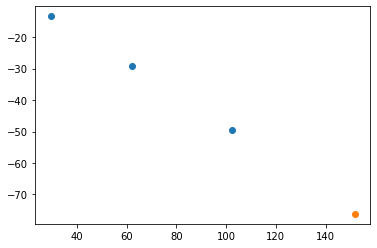

In [7]:
n = 80
plt.scatter(x[n,:,0], x[n,:,1])
plt.scatter(y[n,0], y[n,1])

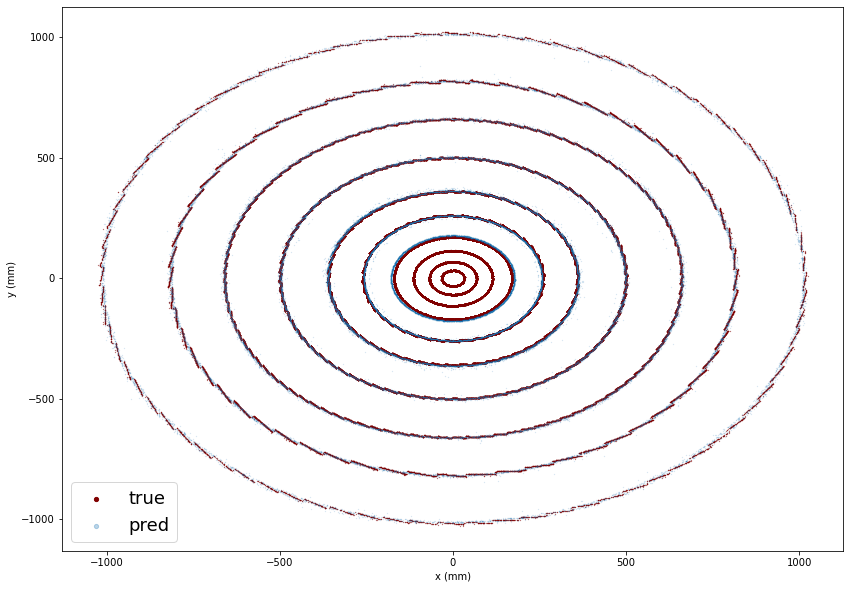

In [12]:
fig = plt.figure(figsize=(14,10))
plt.scatter(x[:,:,0], x[:,:,1], s=.05, label='true', color='maroon')
plt.scatter(y[:,0], y[:,1], s=.05, color='maroon')
plt.scatter(predictions[:,0], predictions[:,1], s=.05,alpha=0.3, label='pred')
lgnd = plt.legend(loc='lower left',prop={'size': 18})
for handle in lgnd.legendHandles:
    handle.set_sizes([18.0])
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.savefig('fig.png')

In [16]:
y_pred_rho = []
for ii in predictions:
    y_pred_rho.append(np.sqrt(ii[0]**2 + ii[1]**2))

In [8]:
x[0]

array([[-23.24197197,  22.14495277,   8.64470291,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [-48.95934296,  47.26752853,  18.32587433,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [-81.00247955,  79.51738739,  30.56811523,   0.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ]])

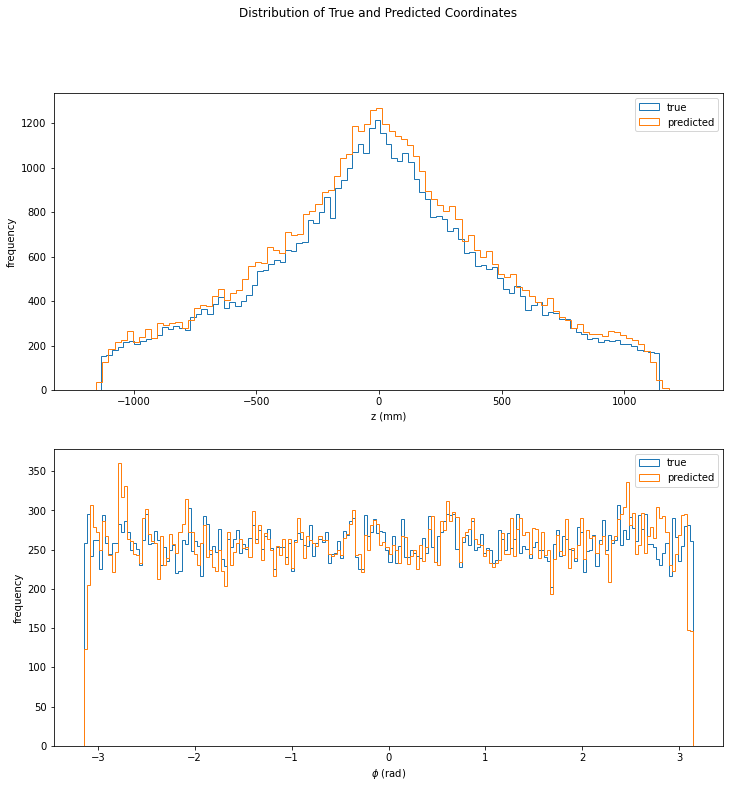

In [8]:
# plot distributions of predicted rho and z
fig, axs = plt.subplots(2, figsize=(12,12))
fig.suptitle('Distribution of True and Predicted Coordinates')

axs[0].hist(Y[:,1], histtype='step', bins=100, label='true')
axs[0].hist(predictions[:,0], histtype='step', bins=100, label='predicted')
axs[0].set_xlabel('z (mm)')
axs[0].set_ylabel('frequency')
axs[0].legend();
#axs[0].set_yscale('log')


axs[1].hist(Y[:,2], histtype='step', bins=200, label='true')
axs[1].hist(predictions[:,1], histtype='step', bins=200, label='predicted')
axs[1].set_xlabel(r'$\phi$ (rad)')
axs[1].set_ylabel('frequency')
axs[1].legend();
#axs[1].set_yscale('log')

In [42]:
y[0,1:3]

array([27.41094589, -5.47458887])

In [41]:
predictions[0]

array([-449.0711   ,    2.8860524], dtype=float32)

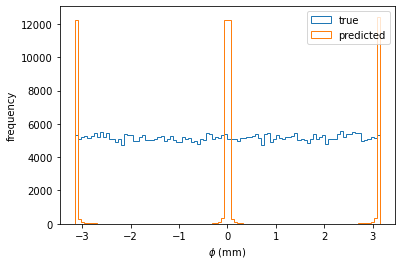

In [10]:
plt.hist(np.arctan2(y[:,1],y[:,0]), histtype='step', bins=100, label='true')
plt.hist(np.arctan2(predictions[:,1],predictions[:,0]), histtype='step', bins=100, label='predicted')
plt.xlabel(r'$\phi$ (mm)')
plt.ylabel('frequency')
plt.legend();
#axs[1].set_yscale('log')

In [17]:
import math

In [18]:
def residuals(layerNum):
    
    if layerNum == 0: layer = 500
    elif layerNum == 1: layer = 650
    elif layerNum == 2: layer = 800
    elif layerNum == 3: layer = 1050
        
    rho = np.sqrt(y[:,0]**2+y[:,1]**2)
    idx = np.where((rho>layer-80)&(rho<layer+80))[0]
    targets = y[idx]
    preds = predictions[idx]
    dPhi = np.arcsin(targets[:,1]/targets[:,0])-np.arcsin(preds[:,1]/preds[:,0])
    dZ = targets[:,2]-preds[:,2]
    dRho = np.sqrt(targets[:,0]**2+targets[:,1]**2) - np.sqrt(preds[:,0]**2+preds[:,1]**2)
    
    res=[]
    for i in dPhi:
        if math.isnan(i): continue
        res.append(i)
        
    stdPhi = np.std(res)
    stdZ = np.std(dZ)
    stdRho = np.std(dRho)
    
    return idx, dPhi, dZ, dRho, stdPhi, stdZ, stdRho

In [19]:
def perLayerUncertainty(layerNum):
    

    _, dPhi, dZ, dRho, stdPhi, stdZ, stdRho = residuals(layerNum)
    
    fig,axs=plt.subplots(1,3, figsize=(12,6))
    axs[0].hist(dPhi, bins=100)
    axs[0].set_xlabel(r'$\Delta \phi$ (rad)')
    #axs[0].set_xlim([-.1,.1])
    axs[0].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdPhi),
        color="black", fontsize=12, bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[0].transAxes)
    axs[0].set_yscale('log')


    axs[1].hist(dZ, bins=100)
    axs[1].set_xlabel(r'$\Delta Z$ (mm)')
    #axs[1].set_xlim([-50,50])
    axs[1].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdZ),
        color="black", fontsize=12,  bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[1].transAxes)
    axs[1].set_yscale('log')
    
    axs[2].hist(dRho, bins=100)
    #axs[2].set_xlim([-100,100])
    axs[2].set_xlabel(r'$\Delta \rho (mm)$')
    axs[2].text(.65, .9, r"$\sigma=$" + "{:.4f}".format(stdRho),
        color="black", fontsize=12,  bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
                transform=axs[2].transAxes)
    axs[2].set_yscale('log')
    
    
    fig.suptitle("Layer" + str(layerNum))
    fig.tight_layout()

    
    
    return dPhi, dZ, dRho

In [20]:
perLayerUncertainty(3);

/tmp/ipykernel_13156/1815135915.py:12: RuntimeWarning: invalid value encountered in arcsin
  dPhi = np.arcsin(targets[:,1]/targets[:,0])-np.arcsin(preds[:,1]/preds[:,0])


In [199]:
idx, dPhi, dZ, dRho, stdPhi, stdZ, stdRho = residuals(3)

/tmp/ipykernel_24325/1815135915.py:12: RuntimeWarning: invalid value encountered in arcsin
  dPhi = np.arcsin(targets[:,1]/targets[:,0])-np.arcsin(preds[:,1]/preds[:,0])


In [205]:
plt.scatter(x[idx[0]][:,0],x[idx[0]][:,1])
plt.scatter(y[idx[0]][0],y[idx[0]][1])
plt.scatter(predictions[idx[0]][0],predictions[idx[0]][1])

Text(0, 0.5, 'Y')

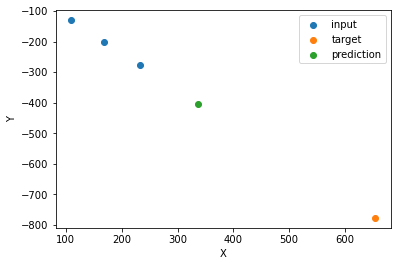

In [212]:
plt.scatter(x[idx[411]][:,0],x[idx[411]][:,1], label='input')
plt.scatter(y[idx[411]][0],y[idx[411]][1], label='target')
plt.scatter(predictions[idx[411]][0],predictions[idx[411]][1], label='prediction')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, '$\\rho$')

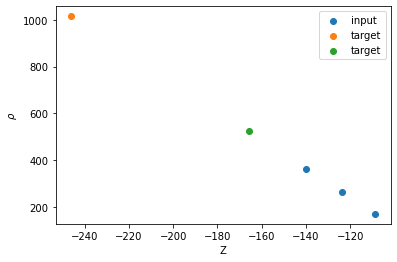

In [213]:
plt.scatter(x[idx[411]][:,2], np.sqrt(x[idx[411]][:,0]**2 + x[idx[411]][:,1]**2), label='input')
plt.scatter(y[idx[411]][2], np.sqrt(y[idx[411]][0]**2 + y[idx[411]][1]**2), label='target')
plt.scatter(predictions[idx[411]][2], np.sqrt(predictions[idx[411]][0]**2 + predictions[idx[411]][1]**2), label='target')
plt.legend()
plt.xlabel('Z')
plt.ylabel(r'$\rho$')

/tmp/ipykernel_13156/2832695684.py:1: RuntimeWarning: invalid value encountered in arcsin
  plt.hist(np.arcsin(y[:,1]/y[:,0])-np.arcsin(predictions[:,1]/predictions[:,0]), histtype='step', bins=500)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


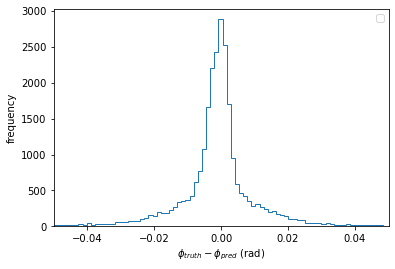

In [30]:
plt.hist(np.arcsin(y[:,1]/y[:,0])-np.arcsin(predictions[:,1]/predictions[:,0]), histtype='step', bins=500)
plt.xlabel(r'$\phi_{truth} - \phi_{pred} $ (rad)')
plt.ylabel('frequency')
plt.xlim([-.05, .05])
plt.legend();
#axs[1].set_yscale('log')

In [19]:
import math
res = []
for i in range(len(y)):
    deltaPhi = np.arcsin(y[i,1]/y[i,0])-np.arcsin(predictions[i,1]/predictions[i,0])
    if math.isnan(deltaPhi): continue
    res.append(deltaPhi)
np.std(res)

/tmp/ipykernel_24325/4000026084.py:4: RuntimeWarning: invalid value encountered in arcsin
  deltaPhi = np.arcsin(y[i,1]/y[i,0])-np.arcsin(predictions[i,1]/predictions[i,0])


0.010523038

In [18]:
np.std(deltaPhi)

nan

nan

In [31]:
plt.hist(y[:,2]-predictions[:,2], histtype='step', bins=500)
plt.xlabel(r'$z_{truth} - z_{pred} $ (rad)')
plt.ylabel('frequency')
plt.xlim([-40, 40])
#axs[1].set_yscale('log')

(-40.0, 40.0)

In [14]:
np.std(y[:,2]-predictions[:,2])

13.045719

In [11]:
res = []
for i in range(len(y)):
    deltaZ = y[:,2]-predictions[:,2]
    if math.isnan(deltaZ): continue
    res.append(deltaZ)
np.std(res)

TypeError: only size-1 arrays can be converted to Python scalars

In [16]:
#Plot the distribution of angles between predictions and truth
angles = []
for p in range(len(y)):
    norm_a = np.linalg.norm(y[p])
    norm_b = np.linalg.norm(predictions[p])
    angle = np.dot(y[p], predictions[p]) / (norm_a * norm_b)
    angle = np.arccos(angle)
    angles.append(angle)
angles = np.array(angles)

/tmp/ipykernel_24325/2015781035.py:7: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(angle)


Text(0.5, 0, 'angle between predicted and true hits (rads)')

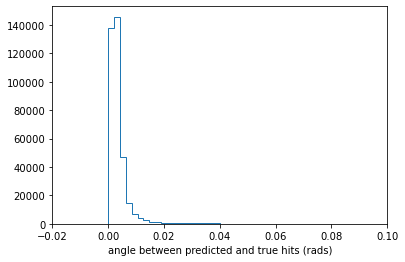

In [17]:
plt.hist(angles, bins=100, histtype='step');
plt.xlim([-.02,.1])
plt.xlabel('angle between predicted and true hits (rads)')

In [23]:
angles

array([0.00799353, 0.00210018, 0.00133721, ..., 0.00129187, 0.00336525,
       0.00529285], dtype=float32)

In [109]:
# Plot the number of hits in an event closer than the predicted one
n_neighbors = []
for i in range(len(newdf) - 3):
    window = newdf.iloc[[i, i+1, i+2]][['x','y','z']].values
    pred = model.predict(window[np.newaxis, :])[0]
    err = displacement(newdf.iloc[i+3][['x','y','z']].values, pred)
    count = 0
    # rather than compare this to every hit, just compare to nearby ones
    xCut = .1
    yCut = .1
    zCut = .1

    nearbyHits = newdf.loc[(newdf.x >= newdf.x-xCut) & (newdf.x <= newdf.x+xCut)]
    nearbyHits = nearbyHits.loc[(nearbyHits.y >= nearbyHits.y-yCut) & (nearbyHits.y <= nearbyHits.y+yCut)]
    nearbyHits = nearbyHits.loc[(nearbyHits.z >= nearbyHits.z-zCut) & (nearbyHits.z <= nearbyHits.z+zCut)]
    for j in range(len(nearbyHits)):
        dist = displacement(nearbyHits.iloc[j][['x','y','z']].values, pred)
        if dist < err:
            count += 1
        n_neighbors.append(count)


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


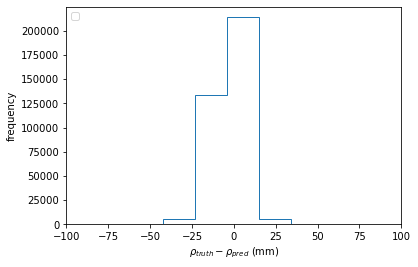

In [10]:
plt.hist(np.sqrt(y[:,0]**2+y[:,1]**2) - np.sqrt(predictions[:,0]**2+predictions[:,1]**2), histtype='step', bins=30)
plt.xlabel(r'$\rho_{truth} - \rho_{pred}$ (mm)')
plt.ylabel('frequency')
plt.xlim([-100,100])
plt.legend();
#axs[1].set_yscale('log')

In [62]:
# Plot errors as a function of pT

In [63]:
from scipy.stats import binned_statistic


mean_stat = binned_statistic(pt, err, 
                             statistic='mean', 
                             bins=20, 
                             range=(min(pt), 200))

std_stat = binned_statistic(pt, err, 
                             statistic='std', 
                             bins=20, 
                             range=(min(pt), 200))

(-10.0, 200.0)

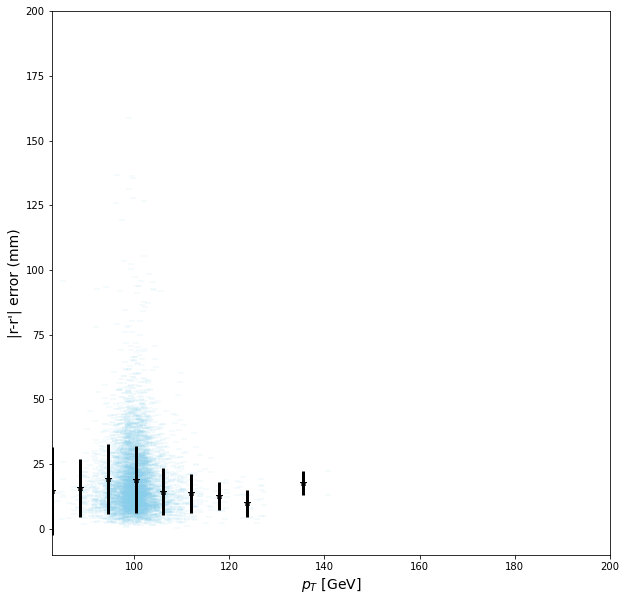

In [64]:
fig = plt.figure(figsize=(10,10))
plt.scatter(pt, err,marker='_', alpha=.1, color='skyblue')
plt.errorbar(mean_stat.bin_edges[:-1], mean_stat.statistic, yerr=std_stat.statistic, 
             fmt='*',
             color='black',
             lw=10,
            ecolor='black',
            elinewidth=3)
#plt.xscale('log')
plt.xlabel('$p_{T}$ [GeV]', fontsize=14);
plt.ylabel("|r-r'| error (mm)", fontsize=14);
plt.xlim([min(pt),200])
plt.ylim([-10, 200])
#plt.xscale('log')
#plt.title('Sum of Distance Between Predicted and True Hits per Track')
#plt.savefig('Etaefficiency.pdf')

In [124]:
def get_eta(r, z):
    # eta = -ln(tan(theta/2))
    if z == 0:
        return 0

    sign = 1
    if z < 0:
        sign = -1
        z = abs(z)
    theta = math.atan(r/float(z))
    tan_theta_over_two = math.tan(theta/2.)
    try:
        eta = -math.log( tan_theta_over_two )
    except ValueError:
        print ("can't take log of", tan_theta_over_two, 'from theta =', theta)
        sys.exit()
    return eta * sign

#find eta of the first hit in every track
eta=[]
for ii in range(len(x)):
    hitx = x[ii,0,0]*1015
    hity = x[ii,0,1]*1015
    hitz = x[ii,0,2]*3000
    hitr = np.sqrt((hitx)**2 + (hity)**2 + (hitz)**2)
    eta.append(get_eta(hitr,hitz))
    
from scipy.stats import binned_statistic

mean_stat = binned_statistic(eta, err, 
                             statistic='mean', 
                             bins=20, 
                             range=(min(eta), max(eta)))

std_stat = binned_statistic(eta, err, 
                             statistic='std', 
                             bins=20, 
                             range=(min(eta), max(eta)))

(0.0, 100.0)

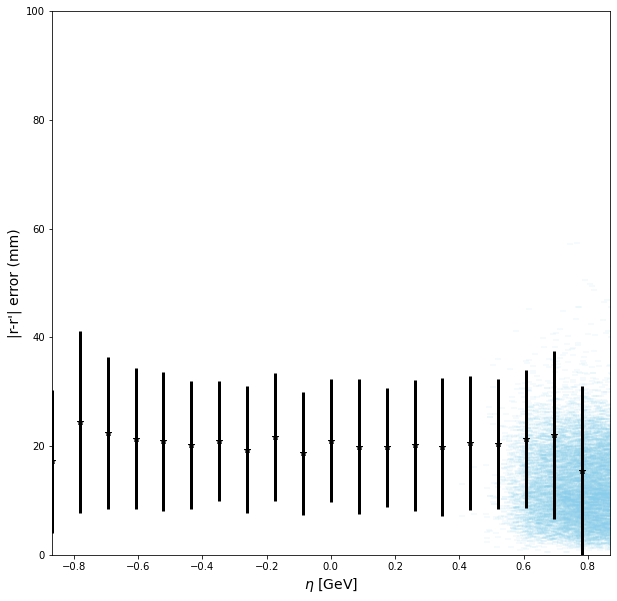

In [125]:
fig = plt.figure(figsize=(10,10))
plt.scatter(pt, err,marker='_', alpha=.1, color='skyblue')
plt.errorbar(mean_stat.bin_edges[:-1], mean_stat.statistic, yerr=std_stat.statistic, 
             fmt='*',
             color='black',
             lw=10,
            ecolor='black',
            elinewidth=3)
#plt.xscale('log')
plt.xlabel('$\eta$ [GeV]', fontsize=14);
plt.ylabel("|r-r'| error (mm)", fontsize=14);
plt.xlim([min(eta),max(eta)])
plt.ylim([-0, 100])
#plt.xscale('log')
#plt.title('Sum of Distance Between Predicted and True Hits per Track')
#plt.savefig('Etaefficiency.pdf')

(array([ 72436.,  13819.,  10577.,  14898.,  21731.,  25347.,  27179.,
         30389.,  19776., 321625.]),
 array([-8.68583676e-01, -6.94876923e-01, -5.21170169e-01, -3.47463415e-01,
        -1.73756662e-01, -4.99078769e-05,  1.73656846e-01,  3.47363600e-01,
         5.21070353e-01,  6.94777107e-01,  8.68483861e-01]),
 <BarContainer object of 10 artists>)

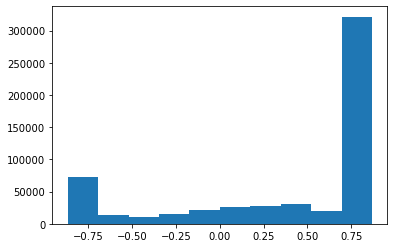

In [126]:
plt.hist(eta)

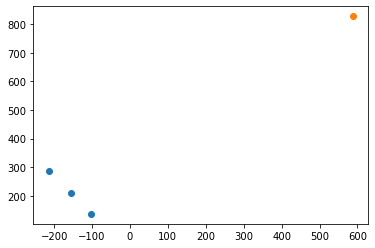

In [14]:
p = [-103.044, 136.598, 204.492, -156.827, 208.269, 336.476, -214.971, 286.931, 241.12]
q = [-0.160838, -0.0337332, -0.0340213, -0.248987, -0.0522221, 0.0488579, -0.340873, -0.0716375, 0.0490678]
r = [588.062, 827.421, 74.3844]
plt.scatter(p[0:9:3], p[1:9:3])
plt.scatter(r[0], r[1])
#plt.scatter(q[0:9:3], q[1:9:3])